## 2. Evaluacion modelos de clasificacion binaria datos estandarizados
***

### Caso de estudio #1


### Tecnicas de ajuste de los datos y modelos:

| Ingeniería de datos       | Si / No       |
| :-------                  | :------:    |
| Escalado de datos         | Si          |
| Ajuste de hiperparametros | Si         |
| Sobremuestreo             | No          |
| Ajuste de pesos de clase  | No          |



### Cargar librerias

In [157]:
# librerias
import numpy as np
import math
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
import pandas_profiling
np.random.seed(9999) 

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
from plot_metric.functions import BinaryClassification
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler



### Funciones

In [158]:
# BINARIA funcion para generar matriz de confusion y medidas de desempeño del modelos clasificacion binarios
def model_evaluation(data_train, label_train, data_test, label_test, modelo, label_pred):
    print('\n')
    print("MATRIZ DE CONFUSION")
    print('\n')
    matriz = confusion_matrix(label_test, label_pred)
    #print(matriz)
    classes = ["Funcional","Falla potencial"]
    cm = ConfusionMatrix(modelo, classes=classes, label_encoder={0:"Funcional", 1:"Falla Potencial"})
    cm.fit(data_train, label_train)
    cm.score(data_test, label_test)
    cm.show()
    # Medidas de desempeño del modelo
    print('\n')
    print("MEDIDAS DE DESEMPEÑO DEL MODELO")
    print('\n')
    print('Exactitud - Accuracy: {}'.format(modelo.score(data_test, label_test)))
    print('ROC AUC: {}'.format (metrics.roc_auc_score(label_test, label_pred)))
    print('-'*60)
    print('Precisión por clase: {}'.format(metrics.precision_score(label_test, label_pred, average=None)))
    print('Sensibilidad - Recall por clase: {}'.format(metrics.recall_score(label_test, label_pred, average=None)))
    print('F1 por clase: {}'.format(metrics.f1_score(label_test, label_pred, average=None)))
    print('-'*60)
    print('F1 Macro: {}'.format(metrics.f1_score(label_test, label_pred, average='macro')))
    print('F1 Micro: {}'.format(metrics.f1_score(label_test, label_pred, average='micro')))
    print('F1 Weighted: {}'.format(metrics.f1_score(label_test, label_pred, average='weighted')))
    print('-'*60)
    print('Sensibilidad - Recall Macro: {}'.format(metrics.recall_score(label_test, label_pred, average='macro')))
    print('Sensibilidad - Recall Micro: {}'.format(metrics.recall_score(label_test, label_pred, average='micro')))
    print('Sensibilidad - Recall Weighted: {}'.format(metrics.recall_score(label_test, label_pred, average='weighted')))
    print('-'*60)
    print('Precisión Macro: {}'.format(metrics.precision_score(label_test, label_pred, average='macro')))
    print('Precisión Micro: {}'.format(metrics.precision_score(label_test, label_pred, average='micro')))
    print('Precisión Weighted: {}'.format(metrics.precision_score(label_test, label_pred, average='weighted')))
    
    TP = matriz[1][1]
    TN = matriz[0][0]
    FP = matriz[0][1]
    FN = matriz[1][0]
    print('-'*60)
    print('Verdaderos positivos - True Positives:', TP)
    print('Verdaderos negativos - True Negatives:', TN)
    print('Falsos positivos - False Positives:', FP)
    print('Falsos negativos - False Negatives:', FN)
        # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
        # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
        # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
        # calculate the specificity
    conf_specificity = (TN / float(TN + FN))
        # calculate precision
    conf_precision = (TP / float(TP + FP))
        # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
        # calculate FPR tasa de falsos positivos
    conf_FPR = 1 - conf_specificity
    print('-'*60)
    print(f'Error de clasificacion: {round(conf_misclassification,3)}') 
    print(f'Especificidad - Specificity: {round(conf_specificity,3)}') 
    print(f'Tasa de falsos positivos FPR: {round(conf_FPR,3)}')
    print('-'*60)
   
    print(classification_report(label_test, label_pred))
    # curva ROC clasificacion binaria
    bc = BinaryClassification(label_test, label_pred, labels=["Class 0", "Class 1"])
    plt.figure(figsize=(5,5))
    bc.plot_roc_curve()
    print('\n')
    print("CURVA ROC")
    plt.show()

In [67]:
# ruta para grabar medidas de desempeño
ruta2 = "D:/alexh/Documents/Maestria en estadistica/proyecto de grado/cuadernos proyecto/Nasa Turbo Fan/Modelos 2.xlsx"
writer = pd.ExcelWriter(ruta2, engine='openpyxl')

### Preparar datos agil

In [68]:
columns=["id","ciclo","set1","set2","set3","sensor1","sensor2","sensor3","sensor4","sensor5","sensor6","sensor7","sensor8",
         "sensor9","sensor10","sensor11","sensor12","sensor13","sensor14","sensor15","sensor16","sensor17","sensor18","sensor19"
         ,"sensor20","sensor21","sensor22","sensor23"]
train=pd.read_csv("train_FD001.txt",sep=" ",names=columns)
test=pd.read_csv("test_FD001.txt",sep=" ",names=columns)
rul=pd.read_csv("RUL_FD001.txt",sep=" ",header=None)
train.drop(['sensor22','sensor23'], axis=1, inplace=True)
test.drop(['sensor22','sensor23'], axis=1, inplace=True)
rul.drop([1], axis=1, inplace=True)
rul.columns = ['ttf']
rul2=pd.DataFrame(train.groupby('id')['ciclo'].max()).reset_index()
rul2.columns = ['id', 'falla']
train= train.merge(rul2, on=['id'], how='left')
train['ttf'] = train['falla'] - train['ciclo']
train.drop('falla', axis=1, inplace=True)
train['clase1']=np.where(train['ttf'] <= 30, 1, 0)
train['clase2']=train['clase1']
train.loc[train['ttf']<=15, 'clase2'] =2
rul3=pd.DataFrame(test.groupby('id')['ciclo'].max()).reset_index()
rul3.columns = ['id', 'falla']
rul['id'] = rul.index + 1
rul['falla'] = rul3['falla'] + rul['ttf']
rul.drop('ttf', axis=1, inplace=True)
test=test.merge(rul, on=['id'], how='left')
test['ttf'] = test['falla'] - test['ciclo']
test.drop('falla', axis=1, inplace=True)
test['clase1']=np.where(test['ttf'] <= 30, 1, 0)
test['clase2']=test['clase1']
test.loc[test['ttf']<=15, 'clase2'] =2
data_train=train.iloc[:,np.r_[2:26]]
label_train=train.iloc[:,27]
data_test=test.iloc[:,np.r_[2:26]]
label_test=test.iloc[:,27]
label_train2=train.iloc[:,28]
label_test2=test.iloc[:,28]

## Estandarizacion de datos

In [69]:
data_train.head()

,set1,set2,set3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [70]:
data_test.head()

,set1,set2,set3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [71]:
scaled_features = StandardScaler().fit_transform(data_train.values)

In [72]:
scaled_features_df = pd.DataFrame(scaled_features, index=data_train.index, columns=data_train.columns)

In [73]:
scaled_features_df.head()

,set1,set2,set3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,-0.315980,-1.372953,0.0,0.0,-1.721725,-0.134255,-0.925936,-1.0,0.141683,1.121141,...,0.334262,-1.058890,-0.269071,-0.603816,-1.0,-0.781710,0.0,0.0,1.348493,1.194427
1,0.872722,-1.031720,0.0,0.0,-1.061780,0.211528,-0.643726,-1.0,0.141683,0.431930,...,1.174899,-0.363646,-0.642845,-0.275852,-1.0,-0.781710,0.0,0.0,1.016528,1.236922
2,-1.961874,1.015677,0.0,0.0,-0.661813,-0.413166,-0.525953,-1.0,0.141683,1.008155,...,1.364721,-0.919841,-0.551629,-0.649144,-1.0,-2.073094,0.0,0.0,0.739891,0.503423
3,0.324090,-0.008022,0.0,0.0,-0.661813,-1.261314,-0.784831,-1.0,0.141683,1.222827,...,1.961302,-0.224597,-0.520176,-1.971665,-1.0,-0.781710,0.0,0.0,0.352598,0.777792
4,-0.864611,-0.690488,0.0,0.0,-0.621816,-1.251528,-0.301518,-1.0,0.141683,0.714393,...,1.052871,-0.780793,-0.521748,-0.339845,-1.0,-0.136018,0.0,0.0,0.463253,1.059552


In [74]:
scaled_features_df.describe()

,set1,set2,set3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
count,2.063100e+04,2.063100e+04,20631.0,20631.0,2.063100e+04,2.063100e+04,2.063100e+04,20631.0,2.063100e+04,2.063100e+04,...,2.063100e+04,2.063100e+04,2.063100e+04,2.063100e+04,20631.0,2.063100e+04,20631.0,20631.0,2.063100e+04,2.063100e+04
mean,-9.880129e-18,6.097267e-16,0.0,0.0,6.258537e-14,-4.962530e-14,8.308134e-16,-1.0,-6.466414e-12,-3.149990e-14,...,-1.199984e-13,3.503748e-13,2.704422e-15,-3.236684e-14,-1.0,1.863604e-14,0.0,0.0,4.174604e-14,2.419665e-14
std,1.000024e+00,1.000024e+00,0.0,0.0,1.000024e+00,1.000024e+00,1.000024e+00,0.0,1.000024e+00,1.000024e+00,...,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,0.0,1.000024e+00,0.0,0.0,1.000024e+00,1.000024e+00
min,-3.973523e+00,-2.055419e+00,0.0,0.0,-2.941625e+00,-3.177804e+00,-2.964737e+00,-1.0,-7.057993e+00,-3.974497e+00,...,-3.692663e+00,-3.005574e+00,-2.296780e+00,-3.126205e+00,-1.0,-3.364479e+00,0.0,0.0,-3.741634e+00,-3.653688e+00
25%,-6.817340e-01,-6.904875e-01,0.0,0.0,-7.118085e-01,-6.953381e-01,-7.303888e-01,-1.0,1.416833e-01,-6.301317e-01,...,-6.148450e-01,-7.807925e-01,-5.508429e-01,-7.264689e-01,-1.0,-7.817098e-01,0.0,0.0,-6.432961e-01,-6.273114e-01
50%,4.055368e-03,-8.021809e-03,0.0,0.0,-8.186036e-02,-6.901297e-02,-9.930481e-02,-1.0,1.416833e-01,8.167571e-02,...,9.020580e-02,-8.554830e-02,-1.684195e-01,-8.653932e-02,-1.0,-1.360176e-01,0.0,0.0,7.596096e-02,7.570228e-02
75%,6.898448e-01,1.015677e+00,0.0,0.0,6.380804e-01,6.290786e-01,6.245530e-01,-1.0,1.416833e-01,7.256920e-01,...,7.274632e-01,6.096959e-01,2.389047e-01,6.253823e-01,-1.0,5.096747e-01,0.0,0.0,7.398906e-01,7.122022e-01
max,3.981634e+00,2.039375e+00,0.0,0.0,3.697829e+00,4.303846e+00,3.617202e+00,-1.0,1.416833e-01,3.041891e+00,...,2.666353e+00,6.449748e+00,7.861686e+00,3.803699e+00,-1.0,4.383828e+00,0.0,0.0,3.395609e+00,3.036489e+00


Se observa en todas las variables que la media es 0 y la desviacion estandar 1

In [75]:
data_train=scaled_features_df

In [76]:
data_train.head()

,set1,set2,set3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,-0.315980,-1.372953,0.0,0.0,-1.721725,-0.134255,-0.925936,-1.0,0.141683,1.121141,...,0.334262,-1.058890,-0.269071,-0.603816,-1.0,-0.781710,0.0,0.0,1.348493,1.194427
1,0.872722,-1.031720,0.0,0.0,-1.061780,0.211528,-0.643726,-1.0,0.141683,0.431930,...,1.174899,-0.363646,-0.642845,-0.275852,-1.0,-0.781710,0.0,0.0,1.016528,1.236922
2,-1.961874,1.015677,0.0,0.0,-0.661813,-0.413166,-0.525953,-1.0,0.141683,1.008155,...,1.364721,-0.919841,-0.551629,-0.649144,-1.0,-2.073094,0.0,0.0,0.739891,0.503423
3,0.324090,-0.008022,0.0,0.0,-0.661813,-1.261314,-0.784831,-1.0,0.141683,1.222827,...,1.961302,-0.224597,-0.520176,-1.971665,-1.0,-0.781710,0.0,0.0,0.352598,0.777792
4,-0.864611,-0.690488,0.0,0.0,-0.621816,-1.251528,-0.301518,-1.0,0.141683,0.714393,...,1.052871,-0.780793,-0.521748,-0.339845,-1.0,-0.136018,0.0,0.0,0.463253,1.059552


In [77]:
# estandarizacion datos base prueba (test)
scaled_features_test = StandardScaler().fit_transform(data_test.values)

In [78]:
scaled_features_test_df = pd.DataFrame(scaled_features_test, index=data_test.index, columns=data_test.columns)

In [79]:
scaled_features_test_df.head()

,set1,set2,set3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1.049295,1.005927,0.0,0.0,1.359276,-0.561495,-0.975674,-1.0,0.17566,0.209138,...,-0.049542,-0.720590,-1.315031,-0.711659,-1.0,-0.463406,0.0,0.0,-0.229408,0.448866
1,-1.220748,-1.034755,0.0,0.0,-1.908502,0.070116,-1.392836,-1.0,0.17566,1.603612,...,0.736727,-0.193647,0.065977,-1.570037,-1.0,0.347276,0.0,0.0,0.899934,0.664042
2,0.141278,0.325700,0.0,0.0,-0.037636,-0.231698,-0.507676,-1.0,0.17566,0.517390,...,0.397202,-0.720590,-0.868436,0.629340,-1.0,0.347276,0.0,0.0,1.323438,0.961247
3,1.911912,-0.014414,0.0,0.0,-0.087526,-0.795350,0.251888,-1.0,0.17566,0.458675,...,-0.657113,-0.369295,-0.593609,-1.177045,-1.0,-1.274088,0.0,0.0,0.758766,0.451244
4,0.640688,-0.014414,0.0,0.0,0.087088,-0.181729,-0.420954,-1.0,0.17566,0.590783,...,0.718857,-0.720590,-0.923402,-0.784053,-1.0,-2.084769,0.0,0.0,0.688182,0.918450


In [80]:
data_test=scaled_features_test_df
data_test.head()

,set1,set2,set3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1.049295,1.005927,0.0,0.0,1.359276,-0.561495,-0.975674,-1.0,0.17566,0.209138,...,-0.049542,-0.720590,-1.315031,-0.711659,-1.0,-0.463406,0.0,0.0,-0.229408,0.448866
1,-1.220748,-1.034755,0.0,0.0,-1.908502,0.070116,-1.392836,-1.0,0.17566,1.603612,...,0.736727,-0.193647,0.065977,-1.570037,-1.0,0.347276,0.0,0.0,0.899934,0.664042
2,0.141278,0.325700,0.0,0.0,-0.037636,-0.231698,-0.507676,-1.0,0.17566,0.517390,...,0.397202,-0.720590,-0.868436,0.629340,-1.0,0.347276,0.0,0.0,1.323438,0.961247
3,1.911912,-0.014414,0.0,0.0,-0.087526,-0.795350,0.251888,-1.0,0.17566,0.458675,...,-0.657113,-0.369295,-0.593609,-1.177045,-1.0,-1.274088,0.0,0.0,0.758766,0.451244
4,0.640688,-0.014414,0.0,0.0,0.087088,-0.181729,-0.420954,-1.0,0.17566,0.590783,...,0.718857,-0.720590,-0.923402,-0.784053,-1.0,-2.084769,0.0,0.0,0.688182,0.918450


In [81]:
data_test.describe()

,set1,set2,set3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
count,1.309600e+04,1.309600e+04,13096.0,13096.0,1.309600e+04,1.309600e+04,1.309600e+04,13096.0,1.309600e+04,1.309600e+04,...,1.309600e+04,1.309600e+04,1.309600e+04,1.309600e+04,13096.0,1.309600e+04,13096.0,13096.0,1.309600e+04,1.309600e+04
mean,-5.801204e-17,-5.282376e-16,0.0,0.0,-6.195294e-14,2.353422e-14,-2.272926e-14,-1.0,-7.341916e-13,1.135941e-13,...,-3.841309e-14,3.659929e-12,1.490161e-14,-2.006011e-14,-1.0,6.606336e-15,0.0,0.0,-1.198768e-14,4.451133e-15
std,1.000038e+00,1.000038e+00,0.0,0.0,1.000038e+00,1.000038e+00,1.000038e+00,0.0,1.000038e+00,1.000038e+00,...,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,0.0,1.000038e+00,0.0,0.0,1.000038e+00,1.000038e+00
min,-3.717796e+00,-2.055096e+00,0.0,0.0,-3.355304e+00,-3.809492e+00,-3.042045e+00,-1.0,-5.692817e+00,-4.223824e+00,...,-4.231060e+00,-3.179658e+00,-2.988533e+00,-3.207504e+00,-1.0,-2.895451e+00,0.0,0.0,-4.111524e+00,-4.759351e+00
25%,-6.759377e-01,-6.946412e-01,0.0,0.0,-6.924392e-01,-6.994096e-01,-7.155089e-01,-1.0,1.756600e-01,-6.569046e-01,...,-6.571126e-01,-7.205902e-01,-6.515191e-01,-6.978700e-01,-1.0,-4.634059e-01,0.0,0.0,-6.529120e-01,-6.436588e-01
50%,5.075357e-03,-1.441380e-02,0.0,0.0,-3.763635e-02,-2.182741e-02,-4.416261e-02,-1.0,1.756600e-01,6.235077e-02,...,5.767683e-02,-1.799933e-02,-5.475118e-02,-3.254138e-02,-1.0,3.472758e-01,0.0,0.0,5.292715e-02,4.110114e-02
75%,6.860884e-01,1.005927e+00,0.0,0.0,6.608200e-01,6.522570e-01,6.451261e-01,-1.0,1.756600e-01,7.082128e-01,...,7.188570e-01,6.845916e-01,5.312199e-01,6.362346e-01,-1.0,3.472758e-01,0.0,0.0,6.881824e-01,6.878189e-01
max,3.546343e+00,2.366382e+00,0.0,0.0,4.552220e+00,3.887762e+00,4.279965e+00,-1.0,1.756600e-01,3.056802e+00,...,3.595884e+00,4.373194e+00,8.002597e+00,3.983562e+00,-1.0,3.590003e+00,0.0,0.0,3.652707e+00,3.639657e+00


Se observa en todas las variables que la media es 0 y la desviacion estandar 1

## Modelos de clasificacion binaria datos estandarizados

## Modelo Random Forest 

In [82]:
modelo1=RandomForestClassifier(random_state=0, n_estimators=10)
modelo1.fit(data_train, label_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [83]:
label_pred1 = modelo1.predict(data_test)

In [84]:
# para evaluar cuales caracteristicas tiene mayor peso en el modelo
fi=modelo1.feature_importances_
fi

array([0.01266145, 0.01039478, 0.        , 0.        , 0.06643491,
       0.02479575, 0.10687156, 0.        , 0.        , 0.1276952 ,
       0.02054716, 0.04286217, 0.        , 0.08569158, 0.10584548,
       0.01715487, 0.04993783, 0.13889008, 0.        , 0.10194181,
       0.        , 0.        , 0.0644057 , 0.02386966])

#### Evaluacion del modelo



MATRIZ DE CONFUSION




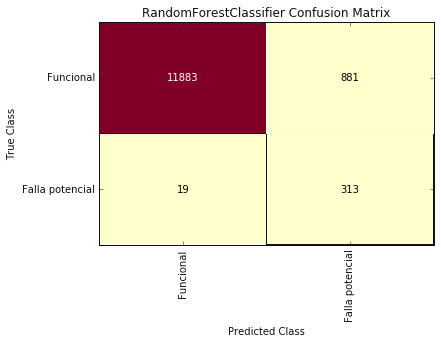



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.9312767257177764
ROC AUC: 0.9368744171295019
------------------------------------------------------------
Precisión por clase: [0.99840363 0.26214405]
Sensibilidad - Recall por clase: [0.93097775 0.94277108]
F1 por clase: [0.96351253 0.4102228 ]
------------------------------------------------------------
F1 Macro: 0.686867666041911
F1 Micro: 0.9312767257177764
F1 Weighted: 0.9494859400168771
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.936874417129502
Sensibilidad - Recall Micro: 0.9312767257177764
Sensibilidad - Recall Weighted: 0.9312767257177764
------------------------------------------------------------
Precisión Macro: 0.6302738416217085
Precisión Micro: 0.9312767257177764
Precisión Weighted: 0.9797385273783686
------------------------------------------------------------
Verdaderos positivos - True Positives: 313
Verdaderos negativos - True Negatives: 11883
Falsos positivos

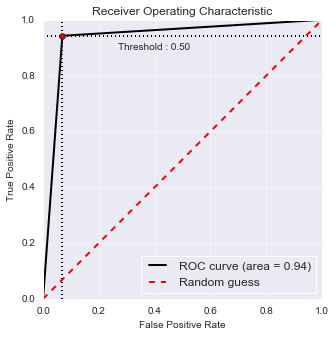

In [85]:
# métricas de desempeño - evaluación del modelo
model_evaluation(data_train, label_train, data_test, label_test, modelo1, label_pred1)

In [86]:
# grabar las medidas de desempeño
report1 = classification_report(label_test, label_pred1, output_dict=True)
df = pd.DataFrame(report1).transpose()
df.to_excel(writer, sheet_name='Random Forest')
writer.save()

### Modelo Random Forest con Grid Search CV

In [87]:
model = RandomForestClassifier(random_state=0)
parameters= {'n_estimators': [10, 50, 100, 200, 300, 400],
             'max_features': ['log2', 'sqrt', 'auto'],
             'criterion': ['entropy', 'gini'],
             'max_depth': [2, 4, 6, 8, 10]                 
}

acc_scorer=make_scorer(accuracy_score)

grid = GridSearchCV(model, param_grid=parameters, cv=2, verbose=2, scoring=acc_scorer)
%time grid.fit(data_train, label_train)


Fitting 2 folds for each of 180 candidates, totalling 360 fits
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=50, total=   0.2s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=50, total=   0.2s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=100, total=   0.4s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=100, total=   0.4s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=200 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=200, total=   0.7s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=200 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=200, total=   0.8s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=300 
[CV]  criterion=entropy, 

[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  7.1min finished


Wall time: 7min 10s


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'c

In [88]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_index_)

{'criterion': 'entropy', 'max_depth': 6, 'max_features': 'log2', 'n_estimators': 200}
0.9592845717609423
39


In [89]:
modelo1a= grid.best_estimator_
modelo1a.fit(data_train, label_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [90]:
label_pred1a = modelo1a.predict(data_test)

In [91]:
# para evaluar cuales caracteristicas tiene mayor peso en el modelo
fi=modelo1a.feature_importances_
fi

array([9.03800154e-04, 6.46171383e-04, 0.00000000e+00, 0.00000000e+00,
       5.18432671e-02, 2.96913527e-02, 1.17724979e-01, 0.00000000e+00,
       1.42218504e-04, 8.82731240e-02, 1.00237474e-02, 4.44656940e-02,
       0.00000000e+00, 1.81785517e-01, 1.39328351e-01, 1.07575831e-02,
       4.46377271e-02, 8.55031845e-02, 0.00000000e+00, 4.40891213e-02,
       0.00000000e+00, 0.00000000e+00, 6.28339476e-02, 8.73502144e-02])



MATRIZ DE CONFUSION




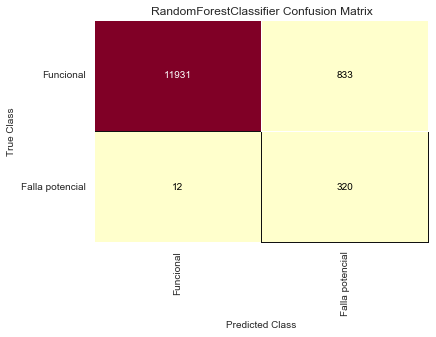



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.9354764813683567
ROC AUC: 0.9492968741150751
------------------------------------------------------------
Precisión por clase: [0.99899523 0.27753686]
Sensibilidad - Recall por clase: [0.93473833 0.96385542]
F1 por clase: [0.96579917 0.43097643]
------------------------------------------------------------
F1 Macro: 0.6983877986023127
F1 Micro: 0.9354764813683568
F1 Weighted: 0.9522407401359841
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.9492968741150751
Sensibilidad - Recall Micro: 0.9354764813683567
Sensibilidad - Recall Weighted: 0.9354764813683567
------------------------------------------------------------
Precisión Macro: 0.6382660438470419
Precisión Micro: 0.9354764813683567
Precisión Weighted: 0.9807053542515819
------------------------------------------------------------
Verdaderos positivos - True Positives: 320
Verdaderos negativos - True Negatives: 11931
Falsos positiv

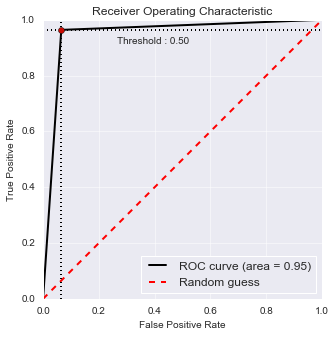

In [92]:
# métricas de desempeño - evaluación del modelo
model_evaluation(data_train, label_train, data_test, label_test, modelo1a, label_pred1a)

In [93]:
report1a = classification_report(label_test, label_pred1a, output_dict=True)
df1a = pd.DataFrame(report1a).transpose()
df1a.to_excel(writer, sheet_name='Random Forest Grid')
writer.save()

## Clasificador Gausiano Naive Bayes

In [94]:
modelo2 = GaussianNB()
modelo2.fit(data_train, label_train);
label_pred2 = modelo2.predict(data_test)



MATRIZ DE CONFUSION




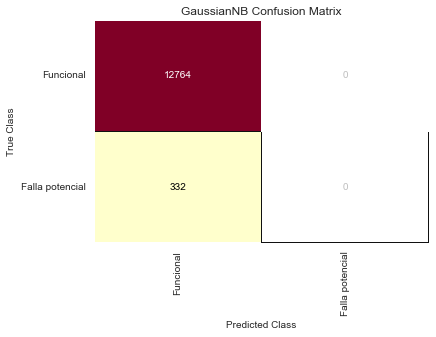



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.9746487477092242
ROC AUC: 0.5
------------------------------------------------------------
Precisión por clase: [0.97464875 0.        ]
Sensibilidad - Recall por clase: [1. 0.]
F1 por clase: [0.98716164 0.        ]
------------------------------------------------------------
F1 Macro: 0.49358081979891727
F1 Micro: 0.9746487477092242
F1 Weighted: 0.9621358558206139
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.5
Sensibilidad - Recall Micro: 0.9746487477092242
Sensibilidad - Recall Weighted: 0.9746487477092242
------------------------------------------------------------
Precisión Macro: 0.4873243738546121
Precisión Micro: 0.9746487477092242
Precisión Weighted: 0.949940181411159
------------------------------------------------------------
Verdaderos positivos - True Positives: 0
Verdaderos negativos - True Negatives: 12764
Falsos positivos - False Positives: 0
Falsos negativos - False

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\alexh\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in true_divide
C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


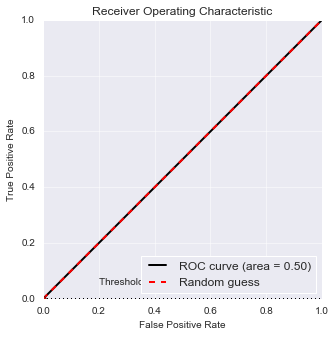

In [95]:
# métricas de desempeño - evaluación del modelo
model_evaluation(data_train, label_train, data_test, label_test, modelo2, label_pred2)

In [96]:
report2 = classification_report(label_test, label_pred2, output_dict=True)
df2 = pd.DataFrame(report2).transpose()
df2.to_excel(writer, sheet_name='Naive Bayes')
writer.save()

## Clasificacion con Support Vector Machine

In [97]:
modelo3 = SVC(kernel='rbf', random_state=0)
modelo3.fit(data_train, label_train)

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [98]:
label_pred3 = modelo3.predict(data_test)



MATRIZ DE CONFUSION




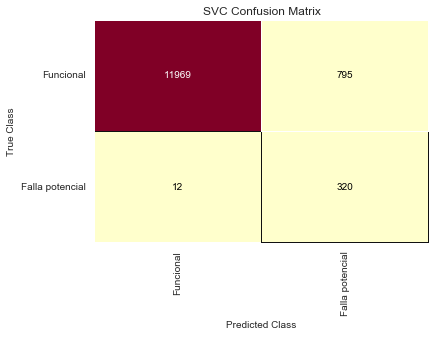



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.9383781307269395
ROC AUC: 0.9507854356945173
------------------------------------------------------------
Precisión por clase: [0.99899841 0.28699552]
Sensibilidad - Recall por clase: [0.93771545 0.96385542]
F1 por clase: [0.96738735 0.4422944 ]
------------------------------------------------------------
F1 Macro: 0.7048408765957339
F1 Micro: 0.9383781307269395
F1 Weighted: 0.9540755871596576
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.9507854356945173
Sensibilidad - Recall Micro: 0.9383781307269395
Sensibilidad - Recall Weighted: 0.9383781307269395
------------------------------------------------------------
Precisión Macro: 0.6429969649254069
Precisión Micro: 0.9383781307269395
Precisión Weighted: 0.9809482490451062
------------------------------------------------------------
Verdaderos positivos - True Positives: 320
Verdaderos negativos - True Negatives: 11969
Falsos positiv

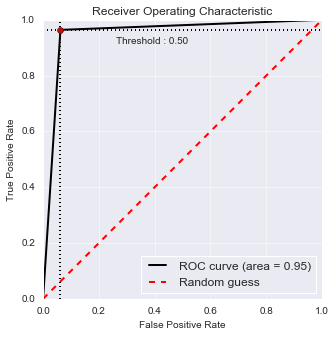

In [99]:
# métricas de desempeño - evaluación del modelo
model_evaluation(data_train, label_train, data_test, label_test, modelo3, label_pred3)

In [100]:
report3 = classification_report(label_test, label_pred3, output_dict=True)
df3 = pd.DataFrame(report3).transpose()
df3.to_excel(writer, sheet_name='SVC')
writer.save()

## Clasificacion Linear SVC

In [101]:
modelo4 = LinearSVC(random_state=0, max_iter=10000)
modelo4.fit(data_train, label_train);
label_pred4 = modelo4.predict(data_test)



MATRIZ DE CONFUSION




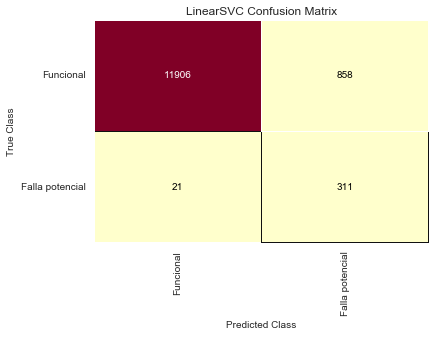



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.9328802687843616
ROC AUC: 0.9347633404190249
------------------------------------------------------------
Precisión por clase: [0.99823929 0.26603935]
Sensibilidad - Recall por clase: [0.93277969 0.93674699]
F1 por clase: [0.96439998 0.41439041]
------------------------------------------------------------
F1 Macro: 0.6893951950977506
F1 Micro: 0.9328802687843617
F1 Weighted: 0.9504565522406525
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.9347633404190249
Sensibilidad - Recall Micro: 0.9328802687843616
Sensibilidad - Recall Weighted: 0.9328802687843616
------------------------------------------------------------
Precisión Macro: 0.632139319439909
Precisión Micro: 0.9328802687843616
Precisión Weighted: 0.9796771036237941
------------------------------------------------------------
Verdaderos positivos - True Positives: 311
Verdaderos negativos - True Negatives: 11906
Falsos positivo

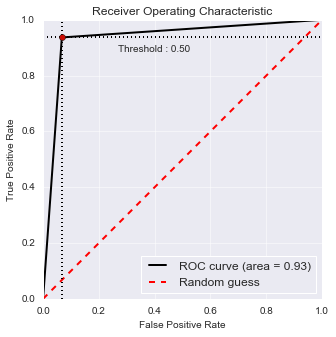

In [102]:
# métricas de desempeño - evaluación del modelo
model_evaluation(data_train, label_train, data_test, label_test, modelo4, label_pred4)

In [103]:
report4 = classification_report(label_test, label_pred4, output_dict=True)
df4 = pd.DataFrame(report4).transpose()
df4.to_excel(writer, sheet_name='linearSVC')
writer.save()

## k-NN KNeighborsClassifier con grid search CV

In [104]:
model = KNeighborsClassifier()
parameters= {'n_neighbors': np.arange(1, 100, 2)            
}

acc_scorer=make_scorer(accuracy_score)

grid = GridSearchCV(model, param_grid=parameters, cv=10, verbose=2, scoring=acc_scorer)
%time grid.fit(data_train, label_train)


Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................... n_neighbors=1, total=   0.8s
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] .................................... n_neighbors=1, total=   0.9s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.8s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.9s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.8s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.8s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.9s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.7s
[CV] n_neighbors=1 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  9.9min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(accuracy_score), verbose=2)

In [105]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_index_)

{'n_neighbors': 81}
0.9612718724249916
40


In [106]:
modelo5= grid.best_estimator_
modelo5.fit(data_train, label_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=81, p=2,
                     weights='uniform')

In [107]:
label_pred5 = modelo5.predict(data_test)



MATRIZ DE CONFUSION




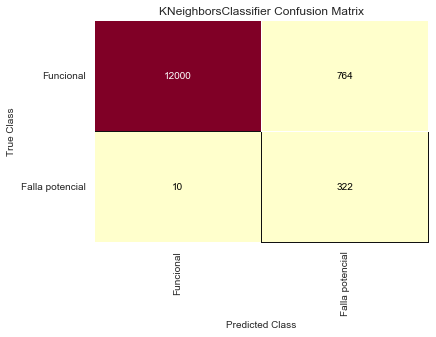



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.9408979841172878
ROC AUC: 0.9550118367547281
------------------------------------------------------------
Precisión por clase: [0.99916736 0.29650092]
Sensibilidad - Recall por clase: [0.94014416 0.96987952]
F1 por clase: [0.96875757 0.45416079]
------------------------------------------------------------
F1 Macro: 0.7114591791316776
F1 Micro: 0.9408979841172878
F1 Weighted: 0.9557118956568622
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.955011836754728
Sensibilidad - Recall Micro: 0.9408979841172878
Sensibilidad - Recall Weighted: 0.9408979841172878
------------------------------------------------------------
Precisión Macro: 0.6478341406716012
Precisión Micro: 0.9408979841172878
Precisión Weighted: 0.9813538863432211
------------------------------------------------------------
Verdaderos positivos - True Positives: 322
Verdaderos negativos - True Negatives: 12000
Falsos positivo

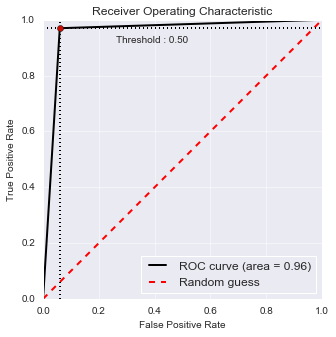

In [108]:
# métricas de desempeño - evaluación del modelo
model_evaluation(data_train, label_train, data_test, label_test, modelo5, label_pred5)

In [109]:
report5 = classification_report(label_test, label_pred5, output_dict=True)
df5 = pd.DataFrame(report5).transpose()
df5.to_excel(writer, sheet_name='KNN')
writer.save()

## Clasificacion con Decision tree con Grid Search

In [110]:
model = tree.DecisionTreeClassifier()
depths = np.arange(1,20)
parameters= {'max_depth' : depths,
             'min_samples_leaf' : [1, 5, 10, 20, 50, 100],
             'criterion': ['entropy', 'gini'],
}

acc_scorer=make_scorer(accuracy_score)

grid = GridSearchCV(model, param_grid=parameters, cv=5, verbose=2, scoring=acc_scorer)
%time grid.fit(data_train, label_train)

Fitting 5 folds for each of 228 candidates, totalling 1140 fits
[CV] criterion=entropy, max_depth=1, min_samples_leaf=1 ..............
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=1 ..............
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=1 ..............
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=1 ..............
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=1 ..............
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=5 ..............
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=5, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=5 ..............
[CV]  c

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=entropy, max_depth=1, min_samples_leaf=5, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=10 .............
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=10, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=10 .............
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=10, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=10 .............
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=10, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=10 .............
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=10, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=10 .............
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=10, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=20 .............
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=20, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=20 .......

[Parallel(n_jobs=1)]: Done 1140 out of 1140 | elapsed:  1.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8, 

In [111]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_index_)

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 1}
0.9531772575250836
30


In [112]:
modelo6= grid.best_estimator_
modelo6.fit(data_train, label_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [113]:
label_pred6 = modelo6.predict(data_test)



MATRIZ DE CONFUSION




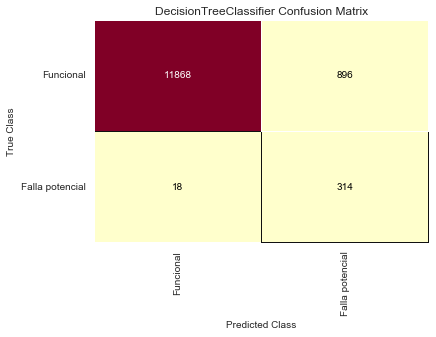



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.9302076970067196
ROC AUC: 0.9377928511287392
------------------------------------------------------------
Precisión por clase: [0.99848561 0.25950413]
Sensibilidad - Recall por clase: [0.92980257 0.94578313]
F1 por clase: [0.96292089 0.40726329]
------------------------------------------------------------
F1 Macro: 0.6850920934588782
F1 Micro: 0.9302076970067196
F1 Weighted: 0.9488342765389166
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.9377928511287393
Sensibilidad - Recall Micro: 0.9302076970067196
Sensibilidad - Recall Weighted: 0.9302076970067196
------------------------------------------------------------
Precisión Macro: 0.6289948727790038
Precisión Micro: 0.9302076970067196
Precisión Weighted: 0.9797515073611471
------------------------------------------------------------
Verdaderos positivos - True Positives: 314
Verdaderos negativos - True Negatives: 11868
Falsos positiv

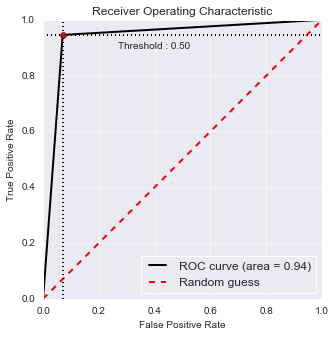

In [114]:
# métricas de desempeño - evaluación del modelo
model_evaluation(data_train, label_train, data_test, label_test, modelo6, label_pred6)

In [115]:
report6 = classification_report(label_test, label_pred6, output_dict=True)
df6 = pd.DataFrame(report6).transpose()
df6.to_excel(writer, sheet_name='Tree')
writer.save()

## Clasificacion por regresion logistica con Grid Search CV

In [116]:
model = LogisticRegression(solver='liblinear')
c = np.arange(1,20)
parameters= {'C' : c,}

acc_scorer=make_scorer(accuracy_score)

grid = GridSearchCV(model, param_grid=parameters, cv=5, verbose=2, scoring=acc_scorer)
%time grid.fit(data_train, label_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.1s
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .............................................. C=1, total=   0.1s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.1s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.1s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.1s
[CV] C=2 .............................................................
[CV] .............................................. C=2, total=   0.1s
[CV] C=2 .............................................................
[CV] .............................................. C=2, total=   0.1s
[CV] C=2 .............................................................
[CV] .............................................. C=2, total=   0.1s
[CV] C=2 .............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    8.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(accuracy_score), verbose=2)

In [117]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_index_)

{'C': 3}
0.958509039794484
2


In [118]:
modelo7= grid.best_estimator_
modelo7.fit(data_train, label_train)

LogisticRegression(C=3, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [119]:
label_pred7 = modelo7.predict(data_test)



MATRIZ DE CONFUSION




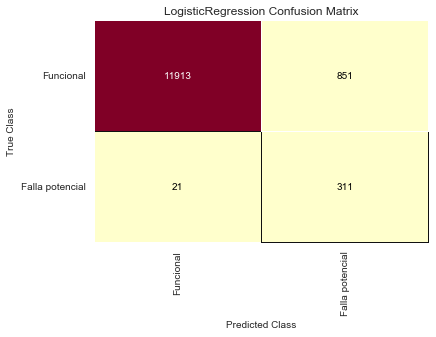



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.93341478313989
ROC AUC: 0.9350375491310274
------------------------------------------------------------
Precisión por clase: [0.99824032 0.267642  ]
Sensibilidad - Recall por clase: [0.93332811 0.93674699]
F1 por clase: [0.9646935  0.41633199]
------------------------------------------------------------
F1 Macro: 0.6905127460472169
F1 Micro: 0.93341478313989
F1 Weighted: 0.9507918466450546
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.9350375491310274
Sensibilidad - Recall Micro: 0.93341478313989
Sensibilidad - Recall Weighted: 0.93341478313989
------------------------------------------------------------
Precisión Macro: 0.6329411591636964
Precisión Micro: 0.93341478313989
Precisión Weighted: 0.979718739304064
------------------------------------------------------------
Verdaderos positivos - True Positives: 311
Verdaderos negativos - True Negatives: 11913
Falsos positivos - False 

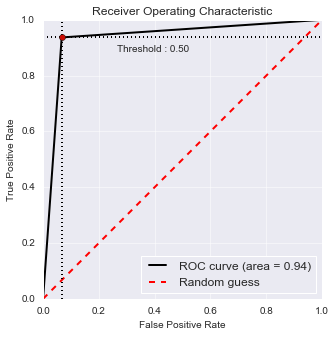

In [120]:
# métricas de desempeño - evaluación del modelo
model_evaluation(data_train, label_train, data_test, label_test, modelo7, label_pred7)

In [121]:
report7 = classification_report(label_test, label_pred7, output_dict=True)
df7 = pd.DataFrame(report7).transpose()
df7.to_excel(writer, sheet_name='LogisticR')
writer.save()

## Clasificacion con red neuronal MLP

In [122]:
modelo8= MLPClassifier(random_state=0)
modelo8.fit(data_train, label_train);
label_pred8 = modelo8.predict(data_test)


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)




MATRIZ DE CONFUSION




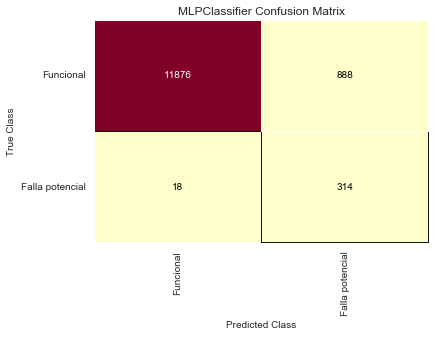



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.9308185705558949
ROC AUC: 0.938106232513885
------------------------------------------------------------
Precisión por clase: [0.99848663 0.26123128]
Sensibilidad - Recall por clase: [0.93042933 0.94578313]
F1 por clase: [0.96325736 0.40938722]
------------------------------------------------------------
F1 Macro: 0.6863222918204215
F1 Micro: 0.9308185705558949
F1 Weighted: 0.9492160590959279
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.938106232513885
Sensibilidad - Recall Micro: 0.9308185705558949
Sensibilidad - Recall Weighted: 0.9308185705558949
------------------------------------------------------------
Precisión Macro: 0.6298589565566273
Precisión Micro: 0.9308185705558949
Precisión Weighted: 0.9797962855164939
------------------------------------------------------------
Verdaderos positivos - True Positives: 314
Verdaderos negativos - True Negatives: 11876
Falsos positivos

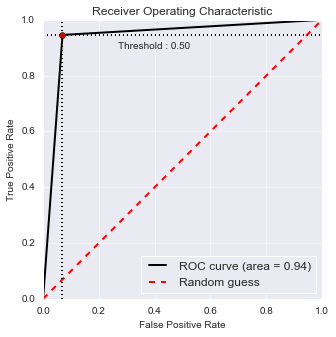

In [123]:
# model_evaluation(data_train, label_train, data_test, label_test, modelo, label_pred):
model_evaluation(data_train, label_train, data_test, label_test, modelo8, label_pred8)

In [124]:
report8 = classification_report(label_test, label_pred8, output_dict=True)
df8 = pd.DataFrame(report8).transpose()
df8.to_excel(writer, sheet_name='MLP')
writer.save()

## Red neronal MLP con grid search CV

In [125]:
model = MLPClassifier(random_state=0)

parameters= {'learning_rate':["constant", "invscaling", "adaptive"],
             'hidden_layer_sizes':[(8),(2,4),(1,8,1),(1,1,1),(2,8,2),(4,16,4), (1,2,1)],
             'activation': ["identity","logistic", "relu", "tanh"],
             'solver': ["lbfgs", "sgd", "adam"]
}

acc_scorer=make_scorer(accuracy_score)

grid = GridSearchCV(model, param_grid=parameters, cv=2, verbose=2, scoring=acc_scorer)
%time grid.fit(data_train, label_train)


Fitting 2 folds for each of 252 candidates, totalling 504 fits
[CV] activation=identity, hidden_layer_sizes=8, learning_rate=constant, solver=lbfgs 
[CV]  activation=identity, hidden_layer_sizes=8, learning_rate=constant, solver=lbfgs, total=   0.0s
[CV] activation=identity, hidden_layer_sizes=8, learning_rate=constant, solver=lbfgs 
[CV]  activation=identity, hidden_layer_sizes=8, learning_rate=constant, solver=lbfgs, total=   0.0s
[CV] activation=identity, hidden_layer_sizes=8, learning_rate=constant, solver=sgd 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  activation=identity, hidden_layer_sizes=8, learning_rate=constant, solver=sgd, total=   0.7s
[CV] activation=identity, hidden_layer_sizes=8, learning_rate=constant, solver=sgd 
[CV]  activation=identity, hidden_layer_sizes=8, learning_rate=constant, solver=sgd, total=   0.7s
[CV] activation=identity, hidden_layer_sizes=8, learning_rate=constant, solver=adam 
[CV]  activation=identity, hidden_layer_sizes=8, learning_rate=constant, solver=adam, total=   0.6s
[CV] activation=identity, hidden_layer_sizes=8, learning_rate=constant, solver=adam 
[CV]  activation=identity, hidden_layer_sizes=8, learning_rate=constant, solver=adam, total=   0.7s
[CV] activation=identity, hidden_layer_sizes=8, learning_rate=invscaling, solver=lbfgs 
[CV]  activation=identity, hidden_layer_sizes=8, learning_rate=invscaling, solver=lbfgs, total=   0.0s
[CV] activation=identity, hidden_layer_sizes=8, learning_rate=invscaling, solver=lbfgs 
[CV]  activation=identity, hidden_layer_sizes=8, learning_rate=invsca

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=8, learning_rate=invscaling, solver=sgd, total=   2.1s
[CV] activation=identity, hidden_layer_sizes=8, learning_rate=invscaling, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=8, learning_rate=invscaling, solver=sgd, total=   2.1s
[CV] activation=identity, hidden_layer_sizes=8, learning_rate=invscaling, solver=adam 
[CV]  activation=identity, hidden_layer_sizes=8, learning_rate=invscaling, solver=adam, total=   0.6s
[CV] activation=identity, hidden_layer_sizes=8, learning_rate=invscaling, solver=adam 
[CV]  activation=identity, hidden_layer_sizes=8, learning_rate=invscaling, solver=adam, total=   0.7s
[CV] activation=identity, hidden_layer_sizes=8, learning_rate=adaptive, solver=lbfgs 
[CV]  activation=identity, hidden_layer_sizes=8, learning_rate=adaptive, solver=lbfgs, total=   0.1s
[CV] activation=identity, hidden_layer_sizes=8, learning_rate=adaptive, solver=lbfgs 
[CV]  activation=identity, hidden_layer_sizes=8, learning_rate=adaptive, solver=lbfgs, total=   0.0s
[CV] activation=identity, hidden_layer_sizes=8, learning_rate=adaptive, solver=sgd 
[CV]  activation=identity, hidden_layer_sizes=8, learning_rate=

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=sgd, total=   2.4s
[CV] activation=identity, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=sgd, total=   2.3s
[CV] activation=identity, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=adam 
[CV]  activation=identity, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=adam, total=   0.5s
[CV] activation=identity, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=adam 
[CV]  activation=identity, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=adam, total=   0.6s
[CV] activation=identity, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=identity, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=lbfgs, total=   0.0s
[CV] activation=identity, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=identity, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=lbfgs, total=   0.0s
[CV] activation=identity, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=sgd 
[CV]  activat

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=8, learning_rate=constant, solver=sgd, total=   2.1s
[CV] activation=logistic, hidden_layer_sizes=8, learning_rate=constant, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=8, learning_rate=constant, solver=sgd, total=   2.3s
[CV] activation=logistic, hidden_layer_sizes=8, learning_rate=constant, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=8, learning_rate=constant, solver=adam, total=   2.7s
[CV] activation=logistic, hidden_layer_sizes=8, learning_rate=constant, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=8, learning_rate=constant, solver=adam, total=   2.0s
[CV] activation=logistic, hidden_layer_sizes=8, learning_rate=invscaling, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=8, learning_rate=invscaling, solver=lbfgs, total=   0.4s
[CV] activation=logistic, hidden_layer_sizes=8, learning_rate=invscaling, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=8, learning_rate=invscaling, solver=lbfgs, total=   0.4s
[CV] activation=logistic, hidden_layer_sizes=8, learning_rate=invscaling, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=8, learning_rate=invscaling, solver=sgd, total=   0.5s
[CV] activation=logistic, hidden_layer_sizes=8, learning_rate=invscaling, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=8, learning_ra

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=8, learning_rate=invscaling, solver=adam, total=   2.7s
[CV] activation=logistic, hidden_layer_sizes=8, learning_rate=invscaling, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=8, learning_rate=invscaling, solver=adam, total=   1.8s
[CV] activation=logistic, hidden_layer_sizes=8, learning_rate=adaptive, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=8, learning_rate=adaptive, solver=lbfgs, total=   0.4s
[CV] activation=logistic, hidden_layer_sizes=8, learning_rate=adaptive, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=8, learning_rate=adaptive, solver=lbfgs, total=   0.4s
[CV] activation=logistic, hidden_layer_sizes=8, learning_rate=adaptive, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=8, learning_rate=adaptive, solver=sgd, total=   2.1s
[CV] activation=logistic, hidden_layer_sizes=8, learning_rate=adaptive, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=8, learning_rate=adaptive, solver=sgd, total=   2.1s
[CV] activation=logistic, hidden_layer_sizes=8, learning_rate=adaptive, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=8, learning_rate=adaptive, solver=adam, total=   2.6s
[CV] activation=logistic, hidden_layer_sizes=8, learning_rate=adaptive, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=8, learning_rate=adaptive, solver=adam, total=   1.7s
[CV] activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=constant, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=constant, solver=lbfgs, total=   0.3s
[CV] activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=constant, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=constant, solver=lbfgs, total=   0.4s
[CV] activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=constant, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=constant, solver=sgd, total=   2.5s
[CV] activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=constant, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=constant, solver=sgd, total=   2.6s
[CV] activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=constant, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=constant, solver=adam, total=   2.7s
[CV] activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=constant, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=constant, solver=adam, total=   3.0s
[CV] activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=lbfgs, total=   0.4s
[CV] activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=lbfgs, total=   0.4s
[CV] activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=sgd, total=   0.9s
[CV] activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=sgd, total=   0.9s
[CV] activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=adam 
[CV]  a

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=adam, total=   2.9s
[CV] activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=lbfgs, total=   0.4s
[CV] activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=lbfgs, total=   0.4s
[CV] activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=sgd, total=   2.6s
[CV] activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=sgd, total=   2.5s
[CV] activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=adam, total=   2.9s
[CV] activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=adam, total=   2.9s
[CV] activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=lbfgs, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=lbfgs, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=sgd, total=   0.7s
[CV] activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=sgd, total=   0.7s
[CV] activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=adam

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=adam, total=   3.6s
[CV] activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=adam, total=   3.6s
[CV] activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=lbfgs, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=lbfgs, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=sgd, total=   0.5s
[CV] activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=sgd, total=   0.5s
[CV] activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=in

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=adam, total=   3.5s
[CV] activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=adam, total=   3.6s
[CV] activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=lbfgs, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=lbfgs, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=sgd, total=   1.5s
[CV] activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=sgd, total=   1.4s
[CV] activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=adam, total=   3.6s
[CV] activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=adam, total=   4.1s
[CV] activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=lbfgs, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=lbfgs, total=   0.2s
[CV] activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=sgd, total=   0.5s
[CV] activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=sgd, total=   0.5s
[CV] activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=a

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=adam, total=   2.8s
[CV] activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=adam, total=   2.9s
[CV] activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=lbfgs, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=lbfgs, total=   0.2s
[CV] activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=sgd, total=   0.3s
[CV] activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=sgd, total=   0.2s
[CV] activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=in

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=adam, total=   2.9s
[CV] activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=adam, total=   2.9s
[CV] activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=lbfgs, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=lbfgs, total=   0.2s
[CV] activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=sgd, total=   1.1s
[CV] activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=sgd, total=   1.1s
[CV] activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=adam, total=   2.8s
[CV] activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=adam, total=   2.9s
[CV] activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=lbfgs, total=   0.8s
[CV] activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=lbfgs, total=   0.8s
[CV] activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=sgd, total=   0.6s
[CV] activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=sgd, total=   0.7s
[CV] activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=a

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=adam, total=   4.0s
[CV] activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=lbfgs, total=   0.6s
[CV] activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=lbfgs, total=   0.7s
[CV] activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=sgd, total=   0.4s
[CV] activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=sgd, total=   0.4s
[CV] activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=in

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=adam, total=   4.1s
[CV] activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=lbfgs, total=   0.7s
[CV] activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=lbfgs, total=   0.6s
[CV] activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=sgd, total=   1.6s
[CV] activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=sgd, total=   1.6s
[CV] activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=adam, total=   4.0s
[CV] activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=lbfgs, total=   1.2s
[CV] activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=lbfgs, total=   0.7s
[CV] activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=sgd, total=   0.6s
[CV] activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=sgd, total=   0.6s
[CV] activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=constant,

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=adam, total=   4.2s
[CV] activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=adam, total=   4.3s
[CV] activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=invscaling, solver=lbfgs, total=   1.4s
[CV] activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=invscaling, solver=lbfgs, total=   0.8s
[CV] activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=invscaling, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=invscaling, solver=sgd, total=   2.1s
[CV] activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=invscaling, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=invscaling, solver=sgd, total=   1.9s
[CV] activation=logistic, hidden_layer_sizes=(4, 16, 4), learni

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=invscaling, solver=adam, total=   4.2s
[CV] activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=invscaling, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=invscaling, solver=adam, total=   4.5s
[CV] activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=lbfgs, total=   1.3s
[CV] activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=lbfgs, total=   0.8s
[CV] activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=sgd, total=   1.7s
[CV] activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=sgd, total=   1.9s
[CV] activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=adapti

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=adam, total=   4.5s
[CV] activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=adam, total=   4.4s
[CV] activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=lbfgs, total=   0.3s
[CV] activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=lbfgs, total=   0.4s
[CV] activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=sgd, total=   0.7s
[CV] activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=sgd, total=   0.6s
[CV] activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=adam, total=   3.7s
[CV] activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=adam, total=   3.6s
[CV] activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=lbfgs, total=   0.3s
[CV] activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=lbfgs, total=   0.3s
[CV] activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=sgd, total=   0.8s
[CV] activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=sgd, total=   0.7s
[CV] activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=in

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=adam, total=   3.5s
[CV] activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=adam, total=   3.5s
[CV] activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=lbfgs, total=   0.3s
[CV] activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=lbfgs, total=   0.3s
[CV] activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=sgd, total=   1.5s
[CV] activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=sgd, total=   1.6s
[CV] activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=adam, total=   3.5s
[CV] activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=adam, total=   3.7s
[CV] activation=relu, hidden_layer_sizes=8, learning_rate=constant, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=8, learning_rate=constant, solver=lbfgs, total=   0.4s
[CV] activation=relu, hidden_layer_sizes=8, learning_rate=constant, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=8, learning_rate=constant, solver=lbfgs, total=   0.4s
[CV] activation=relu, hidden_layer_sizes=8, learning_rate=constant, solver=sgd 
[CV]  activation=relu, hidden_layer_sizes=8, learning_rate=constant, solver=sgd, total=   1.0s
[CV] activation=relu, hidden_layer_sizes=8, learning_rate=constant, solver=sgd 
[CV]  activation=relu, hidden_layer_sizes=8, learning_rate=constant, solver=sgd, total=   1.0s
[CV] activation=relu, hidden_layer_sizes=8, learning_rate=constant, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=8, learning_rate=constant, solver=adam, total=   1.2s
[CV] ac

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=8, learning_rate=invscaling, solver=sgd, total=   2.3s
[CV] activation=relu, hidden_layer_sizes=8, learning_rate=invscaling, solver=sgd 
[CV]  activation=relu, hidden_layer_sizes=8, learning_rate=invscaling, solver=sgd, total=   2.2s
[CV] activation=relu, hidden_layer_sizes=8, learning_rate=invscaling, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=8, learning_rate=invscaling, solver=adam, total=   1.1s
[CV] activation=relu, hidden_layer_sizes=8, learning_rate=invscaling, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=8, learning_rate=invscaling, solver=adam, total=   0.6s
[CV] activation=relu, hidden_layer_sizes=8, learning_rate=adaptive, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=8, learning_rate=adaptive, solver=lbfgs, total=   0.4s
[CV] activation=relu, hidden_layer_sizes=8, learning_rate=adaptive, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=8, learning_rate=adaptive, solver=lbfgs, total=   0.4s
[CV]

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(2, 4), learning_rate=constant, solver=sgd, total=   2.7s
[CV] activation=relu, hidden_layer_sizes=(2, 4), learning_rate=constant, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(2, 4), learning_rate=constant, solver=adam, total=   3.2s
[CV] activation=relu, hidden_layer_sizes=(2, 4), learning_rate=constant, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(2, 4), learning_rate=constant, solver=adam, total=   3.3s
[CV] activation=relu, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=lbfgs, total=   0.2s
[CV] activation=relu, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=lbfgs, total=   0.1s
[CV] activation=relu, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=sgd 
[CV]  activation=relu, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=sgd, total=   1.9s
[CV] activation=relu, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=sgd 
[CV]  activation=relu, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=sgd, total=   2.0s
[CV] activation=relu, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(2, 4

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=adam, total=   3.3s
[CV] activation=relu, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=lbfgs, total=   0.1s
[CV] activation=relu, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=lbfgs, total=   0.1s
[CV] activation=relu, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=sgd, total=   2.8s
[CV] activation=relu, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=sgd, total=   2.7s
[CV] activation=relu, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=adam, total=   3.0s
[CV] activation=relu, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=adam, total=   3.2s
[CV] activation=relu, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=lbfgs, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=lbfgs, total=   0.0s
[CV] activation=relu, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=sgd 
[CV]  activation=relu, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=sgd, total=   0.7s
[CV] activation=relu, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=sgd 
[CV]  activation=relu, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=sgd, total=   0.7s
[CV] activation=relu, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=adam 
[CV]  activation=relu, hidden_layer_si

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=adam, total=   4.4s
[CV] activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=adam, total=   4.0s
[CV] activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=lbfgs, total=   0.6s
[CV] activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=lbfgs, total=   0.6s
[CV] activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=sgd 
[CV]  activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=sgd, total=   0.4s
[CV] activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=sgd 
[CV]  activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=sgd, total=   0.4s
[CV] activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=adam, total=   4.2s
[CV] activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=adam, total=   4.0s
[CV] activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=lbfgs, total=   0.6s
[CV] activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=lbfgs, total=   0.6s
[CV] activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=sgd, total=   3.5s
[CV] activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=sgd, total=   3.6s
[CV] activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=adam, total=   4.3s
[CV] activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=adam, total=   4.2s
[CV] activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=lbfgs, total=   1.0s
[CV] activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=lbfgs, total=   1.0s
[CV] activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=sgd 
[CV]  activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=sgd, total=   2.5s
[CV] activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=sgd 
[CV]  activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=sgd, total=   2.5s
[CV] activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=adam, total=   4.8s
[CV] activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=adam, total=   4.7s
[CV] activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=invscaling, solver=lbfgs, total=   1.1s
[CV] activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=invscaling, solver=lbfgs, total=   1.1s
[CV] activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=invscaling, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=invscaling, solver=sgd, total=   4.0s
[CV] activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=invscaling, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=invscaling, solver=sgd, total=   4.0s
[CV] activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=invscaling, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=invscaling, solver=adam, total=   4.5s
[CV] activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=invscaling, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=invscaling, solver=adam, total=   4.8s
[CV] activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=lbfgs, total=   1.2s
[CV] activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=lbfgs, total=   1.1s
[CV] activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=sgd, total=   3.6s
[CV] activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=sgd, total=   3.5s
[CV] activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=adam, total=   4.5s
[CV] activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=adam, total=   4.5s
[CV] activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=lbfgs, total=   0.3s
[CV] activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=lbfgs, total=   0.3s
[CV] activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=sgd, total=   3.0s
[CV] activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=sgd, total=   3.0s
[CV] activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=adam, total=   3.6s
[CV] activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=adam, total=   3.5s
[CV] activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=lbfgs, total=   0.3s
[CV] activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=lbfgs, total=   0.3s
[CV] activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=sgd 
[CV]  activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=sgd, total=   1.2s
[CV] activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=sgd 
[CV]  activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=sgd, total=   1.3s
[CV] activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=adam, total=   3.9s
[CV] activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=adam, total=   3.8s
[CV] activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=lbfgs, total=   0.3s
[CV] activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=lbfgs, total=   0.3s
[CV] activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=sgd, total=   3.0s
[CV] activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=sgd, total=   3.1s
[CV] activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=adam, total=   4.0s
[CV] activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=adam, total=   3.8s
[CV] activation=tanh, hidden_layer_sizes=8, learning_rate=constant, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=8, learning_rate=constant, solver=lbfgs, total=   0.3s
[CV] activation=tanh, hidden_layer_sizes=8, learning_rate=constant, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=8, learning_rate=constant, solver=lbfgs, total=   0.3s
[CV] activation=tanh, hidden_layer_sizes=8, learning_rate=constant, solver=sgd 
[CV]  activation=tanh, hidden_layer_sizes=8, learning_rate=constant, solver=sgd, total=   1.4s
[CV] activation=tanh, hidden_layer_sizes=8, learning_rate=constant, solver=sgd 
[CV]  activation=tanh, hidden_layer_sizes=8, learning_rate=constant, solver=sgd, total=   1.1s
[CV] activation=tanh, hidden_layer_sizes=8, learning_rate=constant, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=8, learning_rate=constant, solver=adam, total=   2.6s
[CV] activa

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=8, learning_rate=invscaling, solver=sgd, total=   2.7s
[CV] activation=tanh, hidden_layer_sizes=8, learning_rate=invscaling, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=8, learning_rate=invscaling, solver=sgd, total=   2.6s
[CV] activation=tanh, hidden_layer_sizes=8, learning_rate=invscaling, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=8, learning_rate=invscaling, solver=adam, total=   2.5s
[CV] activation=tanh, hidden_layer_sizes=8, learning_rate=invscaling, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=8, learning_rate=invscaling, solver=adam, total=   1.9s
[CV] activation=tanh, hidden_layer_sizes=8, learning_rate=adaptive, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=8, learning_rate=adaptive, solver=lbfgs, total=   0.4s
[CV] activation=tanh, hidden_layer_sizes=8, learning_rate=adaptive, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=8, learning_rate=adaptive, solver=lbfgs, total=   0.4s
[CV] activation=tanh, hidden_layer_sizes=8, learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, hidden_layer_sizes=8, learning_rate=adaptive, solver=sgd, total=   2.0s
[CV] act

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=sgd, total=   3.0s
[CV] activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=sgd, total=   3.1s
[CV] activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=adam, total=   2.9s
[CV] activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=adam, total=   2.5s
[CV] activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=lbfgs, total=   0.4s
[CV] activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=lbfgs, total=   0.3s
[CV] activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, hidden_layer_sizes=(2, 4), lea

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=sgd, total=   2.4s
[CV] activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=sgd, total=   2.5s
[CV] activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=adam, total=   2.8s
[CV] activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=adam, total=   2.9s
[CV] activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=lbfgs, total=   0.2s
[CV] activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=lbfgs, total=   0.2s
[CV] activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=sgd 
[CV]  activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=sgd, total=   0.3s
[CV] activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=sgd 
[CV]  activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=sgd, total=   0.3s
[CV] activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=adam 
[CV]  activation=

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=adam, total=   2.9s
[CV] activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=lbfgs, total=   0.2s
[CV] activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=lbfgs, total=   0.2s
[CV] activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=sgd, total=   2.5s
[CV] activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=sgd, total=   2.4s
[CV] activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=adam, total=   2.7s
[CV] activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=adam, total=   3.0s
[CV] activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=lbfgs, total=   0.6s
[CV] activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=lbfgs, total=   0.5s
[CV] activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=sgd, total=   3.9s
[CV] activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=sgd, total=   3.5s
[CV] activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=adam, total=   2.4s
[CV] activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=adam, total=   3.3s
[CV] activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=lbfgs, total=   0.5s
[CV] activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=tanh, hidden

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=sgd, total=   3.5s
[CV] activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=sgd, total=   3.6s
[CV] activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=adam, total=   2.4s
[CV] activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=adam, total=   2.8s
[CV] activation=tanh, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=lbfgs, total=   1.1s
[CV] activation=tanh, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=lbfgs, total=   1.2s
[CV] activation=tanh, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, hidde

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=sgd, total=   4.3s
[CV] activation=tanh, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=sgd, total=   4.4s
[CV] activation=tanh, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=adam, total=   3.1s
[CV] activation=tanh, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=adam, total=   2.7s
[CV] activation=tanh, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=lbfgs, total=   0.3s
[CV] activation=tanh, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=lbfgs, total=   0.1s
[CV] activation=tanh, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, hidde

[Parallel(n_jobs=1)]: Done 504 out of 504 | elapsed: 12.3min finished


Wall time: 12min 20s


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_sta...
             iid='warn', n_jobs=None,
             param_grid={'activation': ['identity', 'logistic', 'relu', 'tanh'],
                         'hidden_layer_sizes': [8, (2, 4), (1, 8, 1), (1, 1, 1),
                                                (2, 8, 2), (4, 16, 4),
                                                (

In [126]:
modelo9= grid.best_estimator_
modelo9.fit(data_train, label_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(4, 16, 4), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [127]:
label_pred9 = modelo9.predict(data_test)



MATRIZ DE CONFUSION




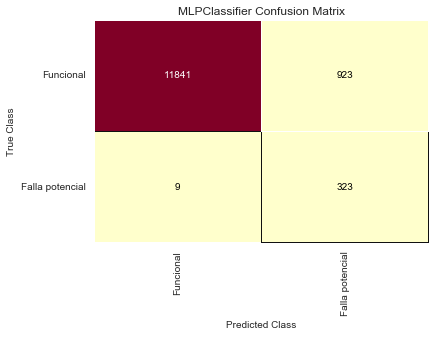



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.9288332315210751
ROC AUC: 0.9502894058213425
------------------------------------------------------------
Precisión por clase: [0.99924051 0.25922953]
Sensibilidad - Recall por clase: [0.92768725 0.97289157]
F1 por clase: [0.96213537 0.40937896]
------------------------------------------------------------
F1 Macro: 0.6857571654121641
F1 Micro: 0.9288332315210751
F1 Weighted: 0.9481223029244044
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.9502894058213425
Sensibilidad - Recall Micro: 0.9288332315210751
Sensibilidad - Recall Weighted: 0.9288332315210751
------------------------------------------------------------
Precisión Macro: 0.6292350204197736
Precisión Micro: 0.9288332315210751
Precisión Weighted: 0.9804803014845962
------------------------------------------------------------
Verdaderos positivos - True Positives: 323
Verdaderos negativos - True Negatives: 11841
Falsos positiv

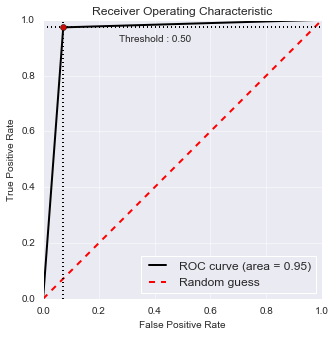

In [128]:
# model_evaluation(data_train, label_train, data_test, label_test, modelo, label_pred):
model_evaluation(data_train, label_train, data_test, label_test, modelo9, label_pred9)

In [129]:
report9 = classification_report(label_test, label_pred9, output_dict=True)
df9 = pd.DataFrame(report9).transpose()
df9.to_excel(writer, sheet_name='MLP 8')
writer.save()